# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "DAE"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'DAE',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.124  1  0.187 0.666 0.001   
                             age        0.286  1  0.432 0.512 0.002   
                             Kiel       2.592  1  3.920 0.049 0.020   
                             Magdeburg  5.438  1  8.223 0.005 0.041   
                             Sweden     8.675  1 13.117 0.000 0.064   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.132  1  0.138 0.710 0.001   
                             age        0.850  1  0.889 0.347 0.005   
                             Kiel       0.174  1  0.182 0.670 0.001   
                             Magdeburg  2.239  1  2.342 0.128 0.012   
                             Sweden    16.395  1 17.143 0.000 0.082   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.177  0.780    False  
                             age               0.291  0.655    False  
                             Kiel              1.308  0.119    False  
                             Magdeburg         2.337  0.018     True  
                             Sweden            3.426  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.148  0.813    False  
                             age               0.460  0.508    False  
                             Kiel              0.174  0.784    False  
                             Magdeburg         0.894  0.251    False  
                             Sweden            4.284  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     DAE                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.074  1  7.564 0.007 0.038   
                             age        0.010  1  0.068 0.795 0.000   
                             Kiel       0.320  1  2.255 0.135 0.012   
                             Magdeburg  0.540  1  3.802 0.053 0.020   
                             Sweden     1.814  1 12.776 0.000 0.063   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         2.673  1  4.921 0.028 0.025   
                             age        0.723  1  1.331 0.250 0.007   
                             Kiel       3.608  1  6.641 0.011 0.034   
                             Magdeburg  3.128  1  5.757 0.017 0.029   
                             Sweden    20.443  1 37.632 0.000 0.165   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.185  0.018     True  
                             age               0.100  0.862    False  
                             Kiel              0.870  0.229    False  
                             Magdeburg         1.278  0.107    False  
                             Sweden            3.352  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.557  0.063    False  
                             age               0.602  0.372    False  
                             Kiel              1.970  0.028     True  
                             Magdeburg         1.760  0.043     True  
                             Sweden            8.317  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                    DAE                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.007         2.185  0.018     True   
                             age       0.795         0.100  0.862    False   
                             Kiel      0.135         0.870  0.229    False   
                             Magdeburg 0.053         1.278  0.107    False   
                             Sweden    0.000         3.352  0.002     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.028         1.557  0.063    False   
                             age       0.250         0.602  0.372    False   
                             Kiel      0.011         1.970  0.028     True   
                             Magdeburg 0.017         1.760  0.043     True   
                             Sweden    0.000         8.317  0.000     True   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.666         0.177  0.780    False  
                             age       0.512         0.291  0.655    False  
                             Kiel      0.049         1.308  0.119    False  
                             Magdeburg 0.005         2.337  0.018     True  
                             Sweden    0.000         3.426  0.002     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.710         0.148  0.813    False  
                             age       0.347         0.460  0.508    False  
                             Kiel      0.670         0.174  0.784    False  
                             Magdeburg 0.128         0.894  0.251    False  
                             Sweden    0.000         4.284  0.000     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'DAE': 'DAE', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model       DAE                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.223         3.343     0.275     0.257         2.488     0.332
std       0.293         6.314     0.319     0.300         5.329     0.327
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.000         0.411     0.002     0.004         0.340     0.015
50%       0.057         1.246     0.114     0.120         0.919     0.241
75%       0.388         3.347     0.517     0.457         2.420     0.609
max       0.999        86.515     0.999     1.000       146.739     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                       DAE                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.007         2.185   
A0A024R0T9;K7ER74;P02655                           AD     0.032         1.500   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.173         0.763   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.250         0.601   
A0A075B6H7                                         AD     0.008         2.101   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.258         0.588   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.960         0.018   
S4R3U6                                             AD     0.028         1.557   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.018     True   
A0A024R0T9;K7ER74;P02655                           AD      0.070    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.279    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.372    False   
A0A075B6H7                                         AD      0.022     True   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.283    False   
Q9Y6X5                                             AD      0.381    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.156    False   
Q9Y6Y9                                             AD      0.975    False   
S4R3U6                                             AD      0.063    False   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.666         0.177   
A0A024R0T9;K7ER74;P02655                           AD     0.068         1.169   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.049         1.314   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.486         0.313   
A0A075B6H7                                         AD     0.081         1.093   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.037         1.437   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.620         0.208   
S4R3U6                                             AD     0.710         0.148   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.780    False  
A0A024R0T9;K7ER74;P02655                           AD      0.154    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.118    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.634    False  
A0A075B6H7                                         AD      0.177    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model       DAE                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.237         1.627     0.296     0.250         1.414     0.331
std       0.292         1.906     0.315     0.290         1.675     0.313
min       0.000         0.001     0.000     0.000         0.002     0.000
25%       0.006         0.380     0.017     0.011         0.376     0.037
50%       0.085         1.069     0.159     0.126         0.900     0.248
75%       0.417         2.215     0.544     0.421         1.943     0.578
max       0.998        23.382     0.999     0.996        26.444     0.997

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,DAE,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,929,1027


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

DAE                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.007         2.185  0.018   
A0A024R0T9;K7ER74;P02655                           0.032         1.500  0.070   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.173         0.763  0.279   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.250         0.601  0.372   
A0A075B6H7                                         0.008         2.101  0.022   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.283   
Q9Y6X5                                             0.258         0.588  0.381   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.156   
Q9Y6Y9                                             0.960         0.018  0.975   
S4R3U6                                             0.028         1.557  0.063   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.666   
A0A024R0T9;K7ER74;P02655                              False 0.068   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.049   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.486   
A0A075B6H7                                             True 0.081   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.037   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.620   
S4R3U6                                                False 0.710   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.177  0.780   
A0A024R0T9;K7ER74;P02655                                   1.169  0.154   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         1.314  0.118   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.313  0.634   
A0A075B6H7                                                 1.093  0.177   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.314   
Q9Y6X5                                                     1.437  0.094   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.181   
Q9Y6Y9                                                     0.208  0.744   
S4R3U6                                                     0.148  0.813   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                              

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
DAE (no)  - PI (no)    872
DAE (yes) - PI (yes)   337
DAE (yes) - PI (no)    155
DAE (no)  - PI (yes)    57
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


DAE                                  PI  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.007         2.185  0.018     True 0.666   
A0A075B6H7                   0.008         2.101  0.022     True 0.081   
A0A075B6I0                   0.001         3.178  0.003     True 0.022   
A0A075B6J9                   0.010         2.003  0.026     True 0.080   
A0A075B6Q5                   0.012         1.921  0.031     True 0.471   
...                            ...           ...    ...      ...   ...   
Q9UKB5                       0.042         1.380  0.088    False 0.008   
Q9UNW1                       0.636         0.196  0.739    False 0.013   
Q9UP79                       0.000         4.463  0.000     True 0.227   
Q9UQ52                       0.000         3.320  0.002     True 0.057   
Q9Y6C2                       0.000         3.416  0.002     True 0.329   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         0.177  0.780    False       186  
A0A075B6H7                           1.093  0.177    False        91  
A0A075B6I0                           1.663  0.063    False       194  
A0A075B6J9                           1.098  0.175    False       156  
A0A075B6Q5                           0.327  0.620    False       104  
...                                    ...    ...      ...       ...  
Q9UKB5                               2.109  0.027     True       148  
Q9UNW1                               1.876  0.042     True       171  
Q9UP79                               0.643  0.378    False       135  
Q9UQ52                               1.245  0.134    False       188  
Q9Y6C2                               0.483  0.490    False       119  

[212 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,DAE,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.018,0.780,186,DAE (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.070,0.154,195,DAE (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.279,0.118,174,DAE (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.372,0.634,196,DAE (no) - PI (no)
A0A075B6H7,0.022,0.177,91,DAE (yes) - PI (no)
...,...,...,...,...
Q9Y6R7,0.283,0.314,197,DAE (no) - PI (no)
Q9Y6X5,0.381,0.094,173,DAE (no) - PI (no)
Q9Y6Y8;Q9Y6Y8-2,0.156,0.181,197,DAE (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,DAE,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
O00187;O00187-2,0.027,0.979,119,DAE (yes) - PI (no),0.952
A0A087X152;D6RE16;E0CX15;O95185;O95185-2,0.986,0.044,176,DAE (no) - PI (yes),0.942
P51674;P51674-2;P51674-3,0.043,0.963,55,DAE (yes) - PI (no),0.920
P48745,0.006,0.917,180,DAE (yes) - PI (no),0.911
Q8NI17;Q8NI17-10;Q8NI17-11;Q8NI17-12;Q8NI17-2;Q8NI17-3;Q8NI17-5;Q8NI17-6;Q8NI17-9,0.049,0.937,196,DAE (yes) - PI (no),0.888
...,...,...,...,...,...
O15354,0.048,0.058,197,DAE (yes) - PI (no),0.011
F5GY80;F5H7G1;P07358,0.046,0.057,197,DAE (yes) - PI (no),0.011
Q9NX62,0.045,0.055,197,DAE (yes) - PI (no),0.011


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_1_DAE


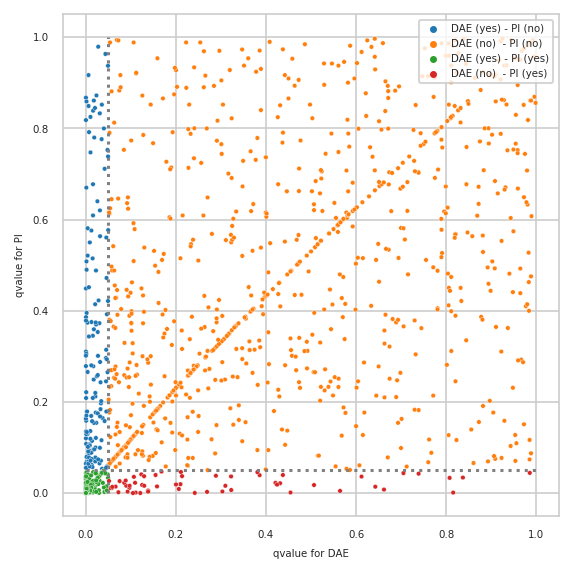

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_2_DAE


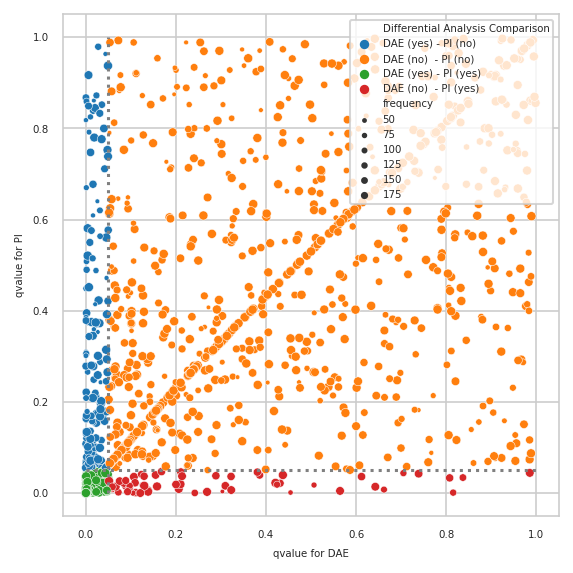

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.505


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/pimms/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out